In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
# loading the datset 
from sklearn.datasets import fetch_california_housing

In [35]:
housing=fetch_california_housing()

In [43]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [45]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [47]:
housing.target_names

['MedHouseVal']

In [49]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [51]:
df = pd.DataFrame(housing.data,columns=housing.feature_names)

In [53]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [55]:
df['target']=housing.target

In [57]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [59]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [65]:
df.duplicated().sum()

0

In [71]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [75]:
# splitting the data into x and y 
x = df.drop(columns=['target'])
y = df['target']

In [77]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [79]:
# split the dataset into x_train, x_test, y_train,y_test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [81]:
x_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80


In [83]:
y_train.head()

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
Name: target, dtype: float64

In [87]:
# scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [91]:
# linear regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [93]:
# prediction 
lr_prediction = lr_model.predict(x_test)

In [95]:
lr_prediction

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

In [111]:
# function to evaluate the model 
def model_evalution(y_actual,y_predi,model_name):
    print(f"{model_name} performane:")
    print("MAE:",mean_absolute_error(y_actual,y_predi))
    print("MSE:",mean_squared_error(y_actual,y_predi))
    print("R2 score:",r2_score(y_actual,y_predi))
    print("\n")

In [113]:
model_evalution(y_test,lr_prediction,'linear Regression')

linear Regression performane:
MAE: 0.5332001304956564
MSE: 0.5558915986952441
R2 score: 0.575787706032451




In [115]:
# Decison Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [117]:
dt_prediction = dt_model.predict(x_test)

In [125]:
from sklearn.metrics import accuracy_score, classification_report

In [137]:
model_evalution(y_test,dt_prediction,'Decision Tree')

Decision Tree performane:
MAE: 0.4514744937015504
MSE: 0.4864498697522044
R2 score: 0.6287801153459606




In [141]:
# random forest regressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
rfr_model = RandomForestRegressor()
rfr_model.fit(x_train,y_train)

RandomForestRegressor()

In [145]:
rfr_prediction = rfr_model.predict(x_test)

In [147]:
model_evalution(y_test,rfr_prediction,'RandomForestRegressor')

RandomForestRegressor performane:
MAE: 0.3265074708575583
MSE: 0.2521667356067681
R2 score: 0.8075663859192432




In [149]:
# gradientboost regressor
gr_model = GradientBoostingRegressor()
gr_model.fit(x_train,y_train)

GradientBoostingRegressor()

In [151]:
gr_prediction = gr_model.predict(x_test)

In [153]:
model_evalution(y_test,gr_prediction,'GradientBoostingRegressor')

GradientBoostingRegressor performane:
MAE: 0.37171553690875236
MSE: 0.29407876957513357
R2 score: 0.7755824521517651




In [155]:
# SVR 
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(x_train,y_train)

SVR()

In [157]:
svr_prediction = svr_model.predict(x_test)

In [159]:
model_evalution(y_test,svr_prediction,'SVR')

SVR performane:
MAE: 0.8599506583445763
MSE: 1.3320115421348744
R2 score: -0.01648536010717372




In [173]:
models = [
    ("Linear Regression", lr_prediction),
    ("Decision Tree", dt_prediction),
    ("Random Forest", rfr_prediction),
    ("Gradient Boosting", gr_prediction),
    ("SVR", svr_prediction)
]

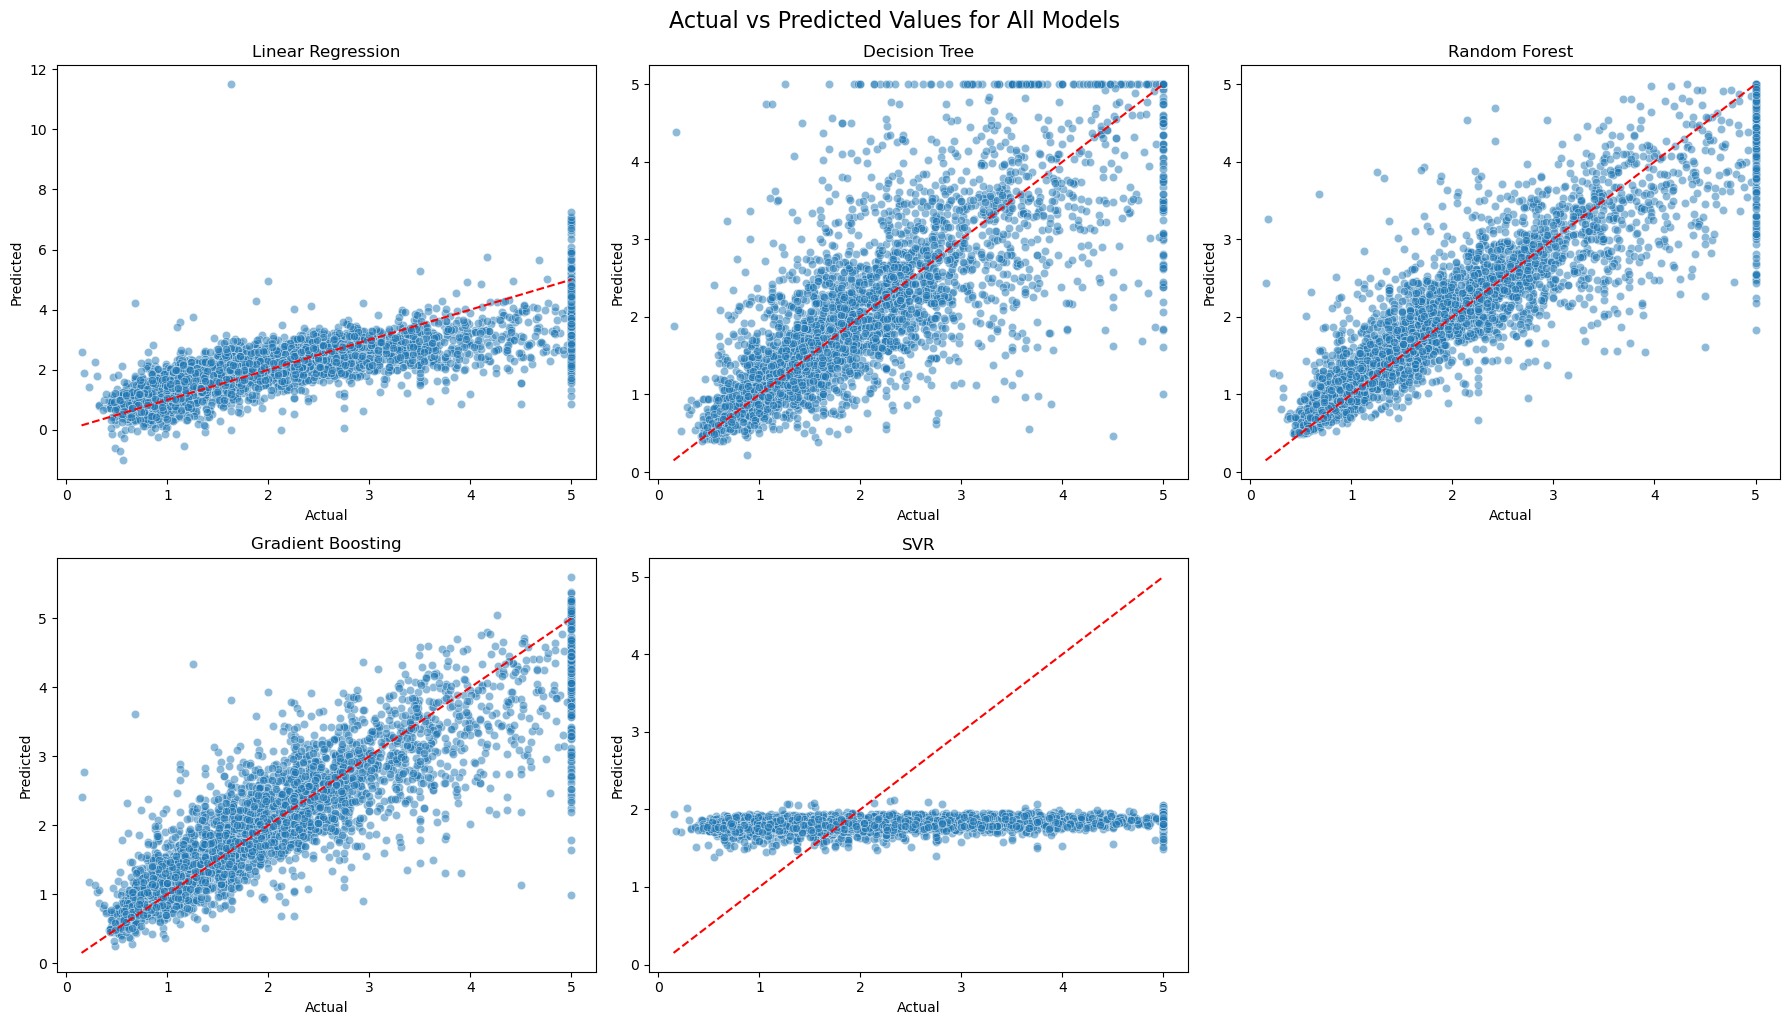

In [175]:
plt.figure(figsize=(18, 10))

for i, (model_name, y_pred) in enumerate(models, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(model_name)

plt.tight_layout()
plt.suptitle("Actual vs Predicted Values for All Models", fontsize=16, y=1.02)
plt.show()